In [ ]:
#RIL - Q- LEARNING algo implemetation

import numpy as np
import pylab as plt

In [ ]:
#map cell to vell, add circlular cell to goal point

points_list = [(0,4),(4,3),(3,2),(3,1),(1,5),(4,5)]

In [ ]:
goal = 5

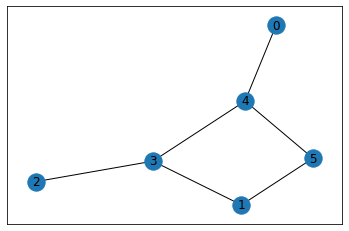

In [ ]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [ ]:
#Set reward matrix

R = np.array([[-1, -1,-1,-1,0,-1],
              [-1,-1,-1,0,-1,100],
              [-1,-1,-1,0,-1,-1],
              [-1,0,0,-1,0,-1],
              [0,-1,-1,0,-1,100],
              [-1,0,-1,-1,0,100]])
print(R)

[[ -1  -1  -1  -1   0  -1]
 [ -1  -1  -1   0  -1 100]
 [ -1  -1  -1   0  -1  -1]
 [ -1   0   0  -1   0  -1]
 [  0  -1  -1   0  -1 100]
 [ -1   0  -1  -1   0 100]]


In [ ]:
#Initialize R matrix

Q = np.zeros([6,6])
print(Q)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
#Set learning parameter gamma

gamma = 0.8

In [ ]:
#Initial state (usually to be choosen at random)

initial_state = 1

In [ ]:
#This function returns all available actions in the state given as an argument

def available_actions(state):
  current_state_row = R[state, :]
  av_act = np.where(current_state_row >=0)[0]
  return av_act

In [ ]:
#Get available actions in the current state

available_act = available_actions(initial_state)

In [ ]:
#This function chooses at random which action to be perfomed within the range of all the available actions

def sample_next_action(available_actions_range):
  next_action = int(np.random.choice(available_act,1))
  return next_action

In [ ]:
#Sample next action to be perfomed

action = sample_next_action(available_act)

In [ ]:
#This function updates the Q matrix according to the path selected and the Q learning algo

def update(current_state, action, gamma):
  
  max_index = np.where(Q[action,] == np.max(Q[action, :]))[0]

  if (max_index.shape[0] > 1):
    max_index = int(np.random.choice(max_index, size = 1))
  else:
    max_index = int(max_index)
  max_value = Q[action, max_index]

  #Q learning formula 
  Q[current_state, action] = R[current_state, action] + gamma * max_value                 


In [ ]:
#update Q matrix
update(initial_state,action,gamma)

In [ ]:
#Training
#train over 10000 iterations. (Re- iterate the process above)

for i in range(10000):
  current_state = np.random.randint(0,int(Q.shape[0]))
  available_act = available_actions(current_state)
  action = sample_next_action(available_act)
  update(current_state, action,gamma)

In [ ]:
#Normalize the trained Q matrix

print ("Trained Q matrix:")
print(Q / np.max(Q) * 100)


Trained Q matrix:
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [ 64.    0.    0.   64.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]


In [ ]:
#Testing

#Goal state = 5

In [ ]:
current_state = 2
steps = [current_state]

while current_state != 5:
  next_step_index = np.where(Q[current_state, :] == np.max(Q[current_state,:]))[0]

  if next_step_index.shape[0] > 1:
    next_step_index = int(np.random.choice(next_step_index, size = 1))
  else:
    next_step_index = int(next_step_index)

  steps.append(next_step_index)
  current_state = next_step_index

In [ ]:
#Print selected sequence of steps

print("Selected path:")
print(steps)

Selected path:
[2, 3, 4, 5]
